<!--- <div style="text-align: center;">

<font size="5">
    <b>Data-driven Design and Analyses of Structures and Materials (3dasm)</b>
</font>
</div> 

<br>
</br>

<div style="text-align: center;">

<font size="5">
    <b>Lecture 1</b>
</font>
</div>

<center>

<img src=docs/tudelft_logo.jpg width=550px>
</center>
    

    
<div style="text-align: center;">
    <font size="4">
    <b>Miguel A. Bessa | <a href = "mailto: M.A.Bessa@tudelft.nl">M.A.Bessa@tudelft.nl</a>  | Associate Professor</b>
</font>


</div> -->

<img src=docs/tudelft_logo.jpg width=50%>

## Data-driven Design and Analyses of Structures and Materials (3dasm)

## Lecture 1

### Miguel A. Bessa | <a href = "mailto: M.A.Bessa@tudelft.nl">M.A.Bessa@tudelft.nl</a>  | Associate Professor

## Introduction

**What:** A lecture of the "3dasm" course

**Where:** This notebook comes from this [repository](https://github.com/bessagroup/3dasm_course)

**Reference for entire course:** Murphy, Kevin P. *Probabilistic machine learning: an introduction*. MIT press, 2022. Available online [here](https://probml.github.io/pml-book/book1.html)

**How:** We try to follow Murphy's book closely, but the sequence of Chapters and Sections is different. The intention is to use notebooks as an introduction to the topic and Murphy's book as a resource.
* If working offline: Go through this notebook and read the book.
* If attending class in person: listen to me (!) but also go through the notebook in your laptop at the same time. Read the book.
* If attending lectures remotely: listen to me (!) via Zoom and (ideally) use two screens where you have the notebook open in 1 screen and you see the lectures on the other. Read the book.

**Optional reference (the "bible" by the "bishop"... pun intended 😆) :** Bishop, Christopher M. *Pattern recognition and machine learning*. Springer Verlag, 2006.

**References/resources to create this notebook:**
* [Figure (Car stopping distance)](https://korkortonline.se/en/theory/reaction-braking-stopping/)
* Snippets of code from this awesome [repo](https://github.com/gerdm/prml) by Gerardo Duran-Martin that replicates many figures in Bishop's book

Apologies in advance if I missed some reference used in this notebook. Please contact me if that is the case, and I will gladly include it here.

## **OPTION 1**. Run this notebook **locally in your computer**:
1. Install miniconda3 [here](https://docs.conda.io/en/latest/miniconda.html)
2. Open a command window and create a virtual environment called "3dasm":
```
conda create -n 3dasm python=3 numpy scipy jupyter nb_conda matplotlib pandas scikit-learn rise tensorflow -c conda-forge
```
3. Install [git](https://github.com/git-guides/install-git), open command window & clone the repository to your computer:
```
git clone https://github.com/bessagroup/3dasm_course
```
4. Load jupyter notebook by typing in (anaconda) command window (it will open in your internet browser):
```
conda activate 3dasm
jupyter notebook
```
5. Open notebook (3dasm_course/Lectures/Lecture1/3dasm_Lecture1.ipynb)

**Short note:** My personal environment also has other packages that help me while teaching.

> conda install -n 3dasm -c conda-forge jupyter_contrib_nbextensions hide_code

Then in the 3dasm conda environment:

> jupyter nbextension install --py hide_code --sys-prefix
>
> jupyter nbextension enable --py hide_code
>
> jupyter serverextension enable --py hide_code
>
> jupyter nbextension enable splitcell/splitcell

## **OPTION 2**. Use **Google's Colab** (no installation required, but times out if idle):

1. go to https://colab.research.google.com
2. login
3. File > Open notebook
4. click on Github (no need to login or authorize anything)
5. paste the git link: https://github.com/bessagroup/3dasm_course
6. click search and then click on the notebook (*3dasm_course/Lectures/Lecture1/3dasm_Lecture1.ipynb*)

In [6]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.style.use("seaborn") # style for plotting that comes from seaborn
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

## Outline for today

* Introduction
    - Taking a probabilistic perspective on machine learning
* Basics of univariate statistics
    - Continuous random variables
    - Probabilities vs probability densities
    - Moments of a probability distribution

**Reading material**: This notebook + Chapter 2 until Section 2.3

# Introduction

## Course landscape (What can be expected from this course)
- What is the course about? [placeholder image]
<img src="docs/ovr-crude.svg">
    - Allows thinking about applying ML to materials science
- Course organization (How does each lecture tie in to the big picture?)
  - Roadmap we will follow -- Answers why we are studying certain concepts
  - Introduction to basic probability
  - ML models from bayesian perspective
      - Bayes theorem
      - ...
  - Final: Apply concepts to materials science
- Timeline

## Get hyped about Artificial Intelligence...

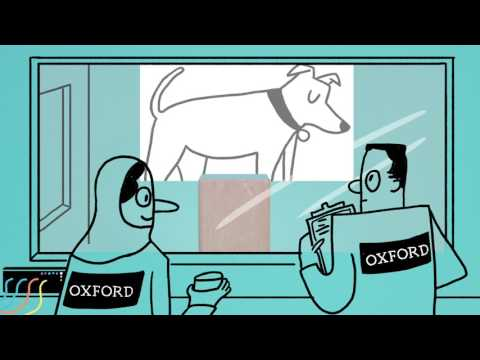

In [7]:
from IPython.display import display, YouTubeVideo, HTML
YouTubeVideo('f_uwKZIAeM0', width=512, height=288) # show that slides are interactive:
                                                   # rescale video to 768x432 and back to 512x288

## or this video

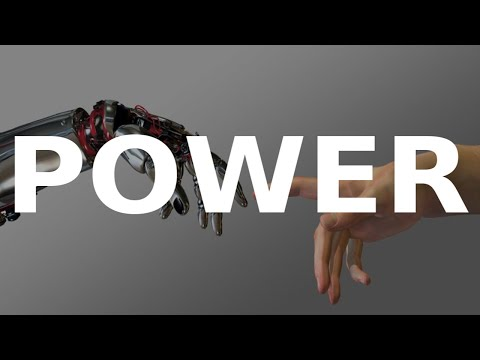

In [8]:
from IPython.display import display, YouTubeVideo, HTML
YouTubeVideo('RNnZwvklwa8', width=512, height=288) # show that slides are interactive:
                                                   # rescale video to 768x432 and back to 512x288

**Well...** This class *might* not make you break the world (yet!). Let's focus on the fundamentals:

* Probabilistic perspective on machine learning
* Supervised learning (especially regression)

## Machine learning (ML)

* **ML definition**: A computer program that learns from experience $E$ wrt tasks $T$ such that the performance $P$ at those tasks improves with experience $E$.

* We'll treat ML from a **probabilistic perspective**:
    - Treat all unknown quantities as **random variables**
    
* What are random variables?
    - Variables endowed with probability distributions!

## The car stopping distance problem

<img src="docs/reaction-braking-stopping.svg" title="Car stopping distance" width="50%" align="right">

<br></br>
Car stopping distance ${\color{red}y}$ as a function of its velocity ${\color{green}x}$ before it starts braking:

${\color{red}y} = {\color{blue}z} x + \frac{1}{2\mu g} {\color{green}x}^2 = {\color{blue}z} x + 0.1 {\color{green}x}^2$

- ${\color{blue}z}$ is the driver's reaction time (in seconds)
- $\mu$ is the road/tires coefficient of friction (assume $\mu=0.5$)
- $g$ is the acceleration of gravity (assume $g=10$ m/s$^2$).

## The car stopping distance problem

### How to obtain this formula?

$y = d_r + d_{b}$

where $d_r$ is the reaction distance, and $d_b$ is the braking distance.

### Reaction distance $d_r$

$d_r = z x$

with $z$ being the driver's reaction time, and $x$ being the velocity of the car at the start of braking.

## The car stopping distance problem

### Braking distance $d_b$

Kinetic energy of moving car:

$E = \frac{1}{2}m x^2$ &nbsp; &nbsp; &nbsp; where $m$ is the car mass.

Work done by braking:

$W = \mu m g d_b$ &nbsp; &nbsp; &nbsp; where $\mu$ is the coefficient of friction between the road and the tire, $g$ is the acceleration of gravity, and $d_b$ is the car braking distance.

The braking distance follows from $E=W$:

$d_b = \frac{1}{2\mu g}x^2$

Therefore, if we add the reacting distance $d_r$ to the braking distance $d_b$ we get the stopping distance $y$:

$$y = d_r + d_b = z x + \frac{1}{2\mu g} x^2$$

## The car stopping distance problem

<img src="docs/reaction-braking-stopping.svg" title="Car stopping distance" width="25%" align="right">

$y = {\color{blue}z} x + 0.1 x^2$

The driver's reaction time ${\color{blue}z}$ is a **random variable (rv)**

* Every driver has its own reaction time $z$

* Assume the distribution associated to $z$ is Gaussian with **mean** $\mu_z=1.5$ seconds and **variance** $\sigma_z^2=0.5$ seconds$^2$

$$
z \sim \mathcal{N}(\mu_z=1.5,\sigma_z^2=0.5^2)
$$

where $\sim$ means "sampled from", and $\mathcal{N}$ indicates a Gaussian **probability density function (pdf)**

## Univariate Gaussian <a title="probability density function">pdf</a> 

The gaussian <a title="probability density function">pdf</a> is defined as:

$$
    \mathcal{N}(z | \mu_z, \sigma_z^2) = \frac{1}{\sqrt{2\pi\sigma_z^2}}e^{-\frac{1}{2\sigma_z^2}(z - \mu_z)^2}
$$

Alternatively, we can write it using the **precision** term $\lambda_z := 1 / \sigma_z^2$ instead of using $\sigma_z^2$:

$$
    \mathcal{N}(z | \mu_z, \lambda_z^{-1}) = \frac{\lambda_z^{1/2}}{\sqrt{2\pi}}e^{-\frac{\lambda_z}{2}(z - \mu_z)^2}
$$

Anyway, recall how this <a title="probability density function">pdf</a> looks like...

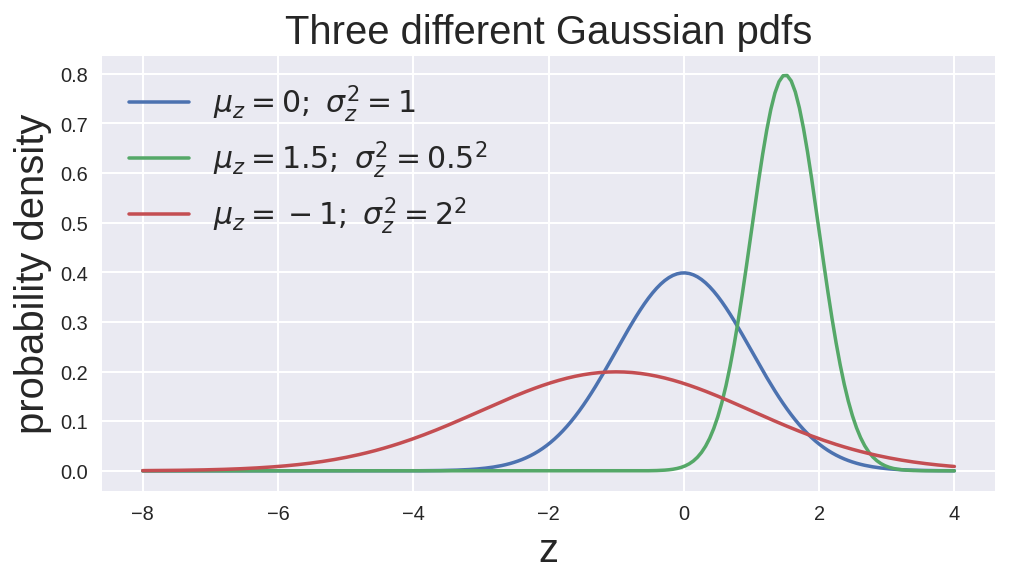

In [9]:
def norm_pdf(z, mu_z, sigma_z2): return 1 / np.sqrt(2 * np.pi * sigma_z2) * np.exp(-(z - mu_z)**2 / (2 * sigma_z2))
zrange = np.linspace(-8, 4, 200) # create a list of 200 z points between z=-8 and z=4
fig, ax = plt.subplots() # create a plot
ax.plot(zrange, norm_pdf(zrange, 0, 1), label=r"$\mu_z=0; \ \sigma_z^2=1$") # plot norm_pdf(z|0,1)
ax.plot(zrange, norm_pdf(zrange, 1.5, 0.5**2), label=r"$\mu_z=1.5; \ \sigma_z^2=0.5^2$") # plot norm_pdf(z|1.5,0.5^2)
ax.plot(zrange, norm_pdf(zrange, -1, 2**2), label=r"$\mu_z=-1; \ \sigma_z^2=2^2$") # plot norm_pdf(z|-1,2^2)
ax.set_xlabel("z", fontsize=20) # create x-axis label with font size 20
ax.set_ylabel("probability density", fontsize=20) # create y-axis label with font size 20
ax.legend(fontsize=15) # create legend with font size 15
ax.set_title("Three different Gaussian pdfs", fontsize=20); # create title with font size 20

The <span style="color:green">green</span> curve shows the Gaussian <a title="probability density function">pdf</a> of the <a title="random variable">rv</a> $z$ **conditioned** on the mean $\mu_z=1.5$ and variance $\sigma_z^2=0.5^2$ for the car stopping distance problem.

## Univariate Gaussian <a title="probability density function">pdf</a> 

$$
    p(z) = \mathcal{N}(z | \mu_z, \sigma_z^2) = \frac{1}{\sqrt{2\pi\sigma_z^2}}e^{-\frac{1}{2\sigma_z^2}(z - \mu_z)^2}
$$

The output of this expression is the **PROBABILITY DENSITY** of $z$ **given** (or conditioned to) a particular $\mu_z$ and $\sigma_z^2$.

* **Important**: Probability Density $\neq$ Probability

So, what is a probability?

## Probability

The probability of an event $A$ is denoted by $\text{Pr}(A)$.

* $\text{Pr}(A)$ means the probability with which we believe event A is true

* An event $A$ is a binary variable saying whether or not some state of the world holds.

Probability is defined such that: $0 \leq \text{Pr}(A) \leq 1$

where $\text{Pr}(A)=1$ if the event will definitely happen and $\text{Pr}(A)=0$ if it definitely will not happen.

## Joint probability

**Joint probability** of two events: $\text{Pr}(A \wedge B)= \text{Pr}(A, B)$

If $A$ and $B$ are **independent**: $\text{Pr}(A, B)= \text{Pr}(A) \text{Pr}(B)$

For example, suppose $z_1$ and $z_2$ are chosen uniformly at random from the set $\mathcal{Z} = \{1, 2, 3, 4\}$.

Let $A$ be the event that $z_1 \in \{1, 2\}$ and $B$ be the event that **another** <a title="random variable">rv</a> denoted as $z_2 \in \{3\}$.

Then we have: $\text{Pr}(A, B) = \text{Pr}(A) \text{Pr}(B) = \frac{1}{2} \cdot \frac{1}{4}$.

## Probability of a union of two events

Probability of event $A$ or $B$ happening is: $\text{Pr}(A \vee B)= \text{Pr}(A) + \text{Pr}(B) - \text{Pr}(A \wedge B)$

If these events are mutually exclusive (they can't happen at the same time):

$$
\text{Pr}(A \vee B)= \text{Pr}(A) + \text{Pr}(B)
$$

For example, suppose an <a title="random variable">rv</a> denoted as $z_1$ is chosen uniformly at random from the set $\mathcal{Z} = \{1, 2, 3, 4\}$.

Let $A$ be the event that $z_1 \in \{1, 2\}$ and $B$ be the event that the **same** <a title="random variable">rv</a> $z_1 \in \{3\}$.

Then we have $\text{Pr}(A \vee B) = \frac{2}{4} + \frac{1}{4}$.

## Conditional probability of one event given another

We define the **conditional probability** of event $B$ happening given that $A$ has occurred as follows:

$$
\text{Pr}(B | A)= \frac{\text{Pr}(A,B)}{\text{Pr}(A)}
$$

This is not defined if $\text{Pr}(A) = 0$, since we cannot condition on an impossible event.

## Conditional independence of one event given another

We say that event $A$ is conditionally independent of event $B$ if we have $\text{Pr}(A | B)= \text{Pr}(A)$

This implies $\text{Pr}(B|A) = \text{Pr}(B)$. Hence, the joint probability becomes $\text{Pr}(A, B) = \text{Pr}(A) \text{Pr}(B)$

The book uses the notation $A \perp B$ to denote this property.

## Coming back to our car stopping distance problem

<img src="docs/reaction-braking-stopping.svg" title="Car stopping distance" width="25%" align="right">

$y = {\color{blue}z} x + 0.1 x^2$

where $z$ is a **continuous** <a title="random variable">rv</a> such that $z \sim \mathcal{N}(\mu_z=1.5,\sigma_z^2=0.5^2)$.

* What is the probability of an event $Z$ defined by a reaction time $z \leq 0.52$ seconds?

$$
\text{Pr}(Z)=\text{Pr}(z \leq 0.52)= P(z=0.52)
$$

where $P(z)$ denotes the **cumulative distribution function (cdf)**. Note that <a title="cumulative distribution function">cdf</a> is denoted with a capital $P$.

Likewise, we can compute the probability of being in any interval as follows:

$\text{Pr}(a \leq z \leq b)= P(z=b)-P(z=a)$

* But how do we compute the cdf at a particular value $b$, e.g. $P(z=b)$?

## <a title="Cumulative distribution functions">Cdf's</a> result from <a title="probability density functions">pdf's</a>

A <a title="probability density functions">pdf</a> $p(z)$ is defined as the derivative of the <a title="cumulative distribution functions">cdf</a> $P(z)$:

$$
p(z)=\frac{d}{d z}P(z)
$$

So, given a <a title="probability density function">pdf</a> $p(z)$, we can compute the following probabilities:

$$\text{Pr}(z \leq b)=\int_{-\infty}^b p(z) dz = P(b)$$
$$\text{Pr}(z \geq a)=\int_a^{\infty} p(z) dz = 1 - P(a)$$
$$\text{Pr}(a \leq z \leq b)=\int_a^b p(z) dz = P(b) - P(a)$$

**IMPORTANT**: $\int_{-\infty}^{\infty} p(z) dz = 1$

### Some notes about <a title="probability density functions">pdf's</a>

The integration to unity is important!

$$\int_{-\infty}^{\infty} p(z) dz = 1$$

**Remember:** the integral of a <a title="probability density function">pdf</a> leads to a probability, and probabilities cannot be larger than 1.

For example, from this property we can derive the following:

$$
\int_{-\infty}^{\infty} p(z) dz = \int_{-\infty}^{a} p(z) dz + \int_{a}^{\infty} p(z) dz
$$

$$
\Rightarrow \text{Pr}(z \geq a)= 1 - \text{Pr}(z \leq a) = 1 - \text{P}(a) = 1 - \int_{-\infty}^a p(z) dz
$$

In some cases we will work with probability distributions that are **unnormalized**, so this comment is important!

* Being unnormalized means that the probability density of the distribution does not integrate to 1.
* In this case, we cannot call such function a <a title="probability density function">pdf</a>, even though its output is a probability density.

## <a title="Cumulative distribution functions">Cdf's</a> result from <a title="probability density functions">pdf's</a>

Key point?

* Given a <a title="probability density function">pdf</a> $p(z)$, we can compute the probability of a continuous <a title="random variable">rv</a> $z$ being in a finite interval as follows:

$$
\text{Pr}(a \leq z \leq b)=\int_a^b p(z) dz = P(b) - P(a)
$$

As the size of the interval gets smaller, we can write

$$
\text{Pr}\left(z - \frac{dz}{2} \leq z \leq z + \frac{dz}{2}\right) \approx p(z) dz
$$

Intuitively, this says the probability of $z$ being in a small interval around $z$ is the density at $z$ times
the width of the interval.

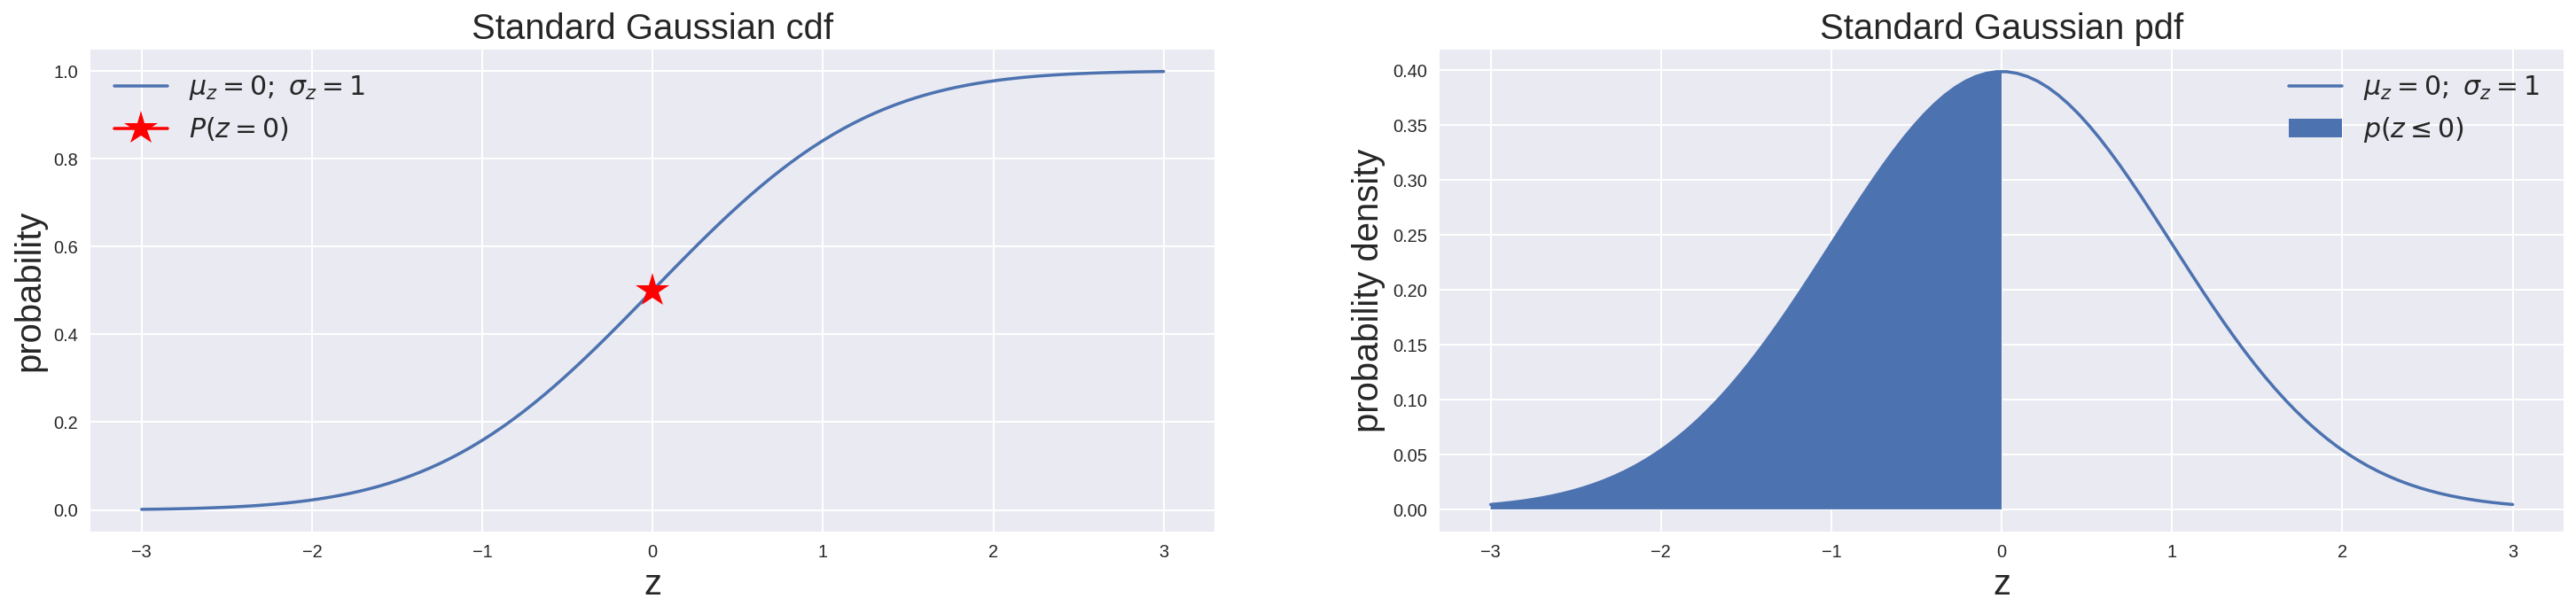

In [29]:
from scipy.stats import norm # import from scipy.stats the normal distribution

zrange = np.linspace(-3, 3, 100) # 100 values for plot
fig_std_norm, (ax1, ax2) = plt.subplots(1, 2) # create a plot with 2 subplots side-by-side
ax1.plot(zrange, norm.cdf(zrange, 0, 1), label=r"$\mu_z=0; \ \sigma_z=1$") # plot cdf of standard normal
ax1.plot(0, norm.cdf(0, 0, 1), marker ='*', label =r'$P(z = 0)$', markersize =20, color = 'r') #For the red marker
ax1.set_xlabel("z", fontsize=20)
ax1.set_ylabel("probability", fontsize=20)
ax1.legend(fontsize=15)
ax1.set_title("Standard Gaussian cdf", fontsize=20)

ax2.plot(zrange, norm.pdf(zrange, 0, 1), label=r"$\mu_z=0; \ \sigma_z=1$") # plot pdf of standard normal
ax2.fill_between(np.linspace(-3, 0, 100), norm.pdf(np.linspace(-3, 0, 100), 0, 1), label = r'$p(z \leq 0)$' ) # To fill teh area under the curve
ax2.set_xlabel("z", fontsize=20)
ax2.set_ylabel("probability density", fontsize=20)
ax2.legend(fontsize=15)
ax2.set_title("Standard Gaussian pdf", fontsize=20)
fig_std_norm.set_size_inches(25, 5) # scale figure to be wider (since there are 2 subplots)

In [ ]:
##Need to add an interactive plot of the above --

## Note about scipy.stats

[scipy](https://docs.scipy.org/doc/scipy/index.html) is an open-source software for mathematics, science, and engineering. It's brilliant and widely used for many things!

**In particular**, [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) is a simple module within scipy that has statistical functions and operations that are very useful. This way, we don't need to code all the functions ourselves. That's why we are using it to plot the cdf and pdf of the Gaussian distribution from now on, and we will use it for other things later.

* In case you are interested, scipy.stats has a nice [tutorial](https://docs.scipy.org/doc/scipy/tutorial/stats.html)

## Coming back to our car stopping distance problem

<img src="docs/reaction-braking-stopping.svg" title="Car stopping distance" width="25%" align="right">

$y = {\color{blue}z} x + 0.1 x^2$

where $z$ is a continuous <a title="random variable">rv</a> such that $p(z)= \mathcal{N}(z | \mu_z=1.5,\sigma_z^2=0.5^2)$.

* What is the probability of an event $Z$ defined by a reaction time $z \leq 0.52$ seconds?

$$
\text{Pr}(Z) = \text{Pr}(z \leq 0.52) = P(z=0.52) = \int_{-\infty}^{0.52} p(z) dz
$$

In [5]:
Pr_Z = norm.cdf(0.52, 1.5, 0.5) # using scipy norm.cdf(z=0.52 | mu_z=1.5, sigma_z=0.5)

print("The probability of event Z is: Pr(Z) = ",round(Pr_Z,3))

The probability of event Z is: Pr(Z) =  0.025


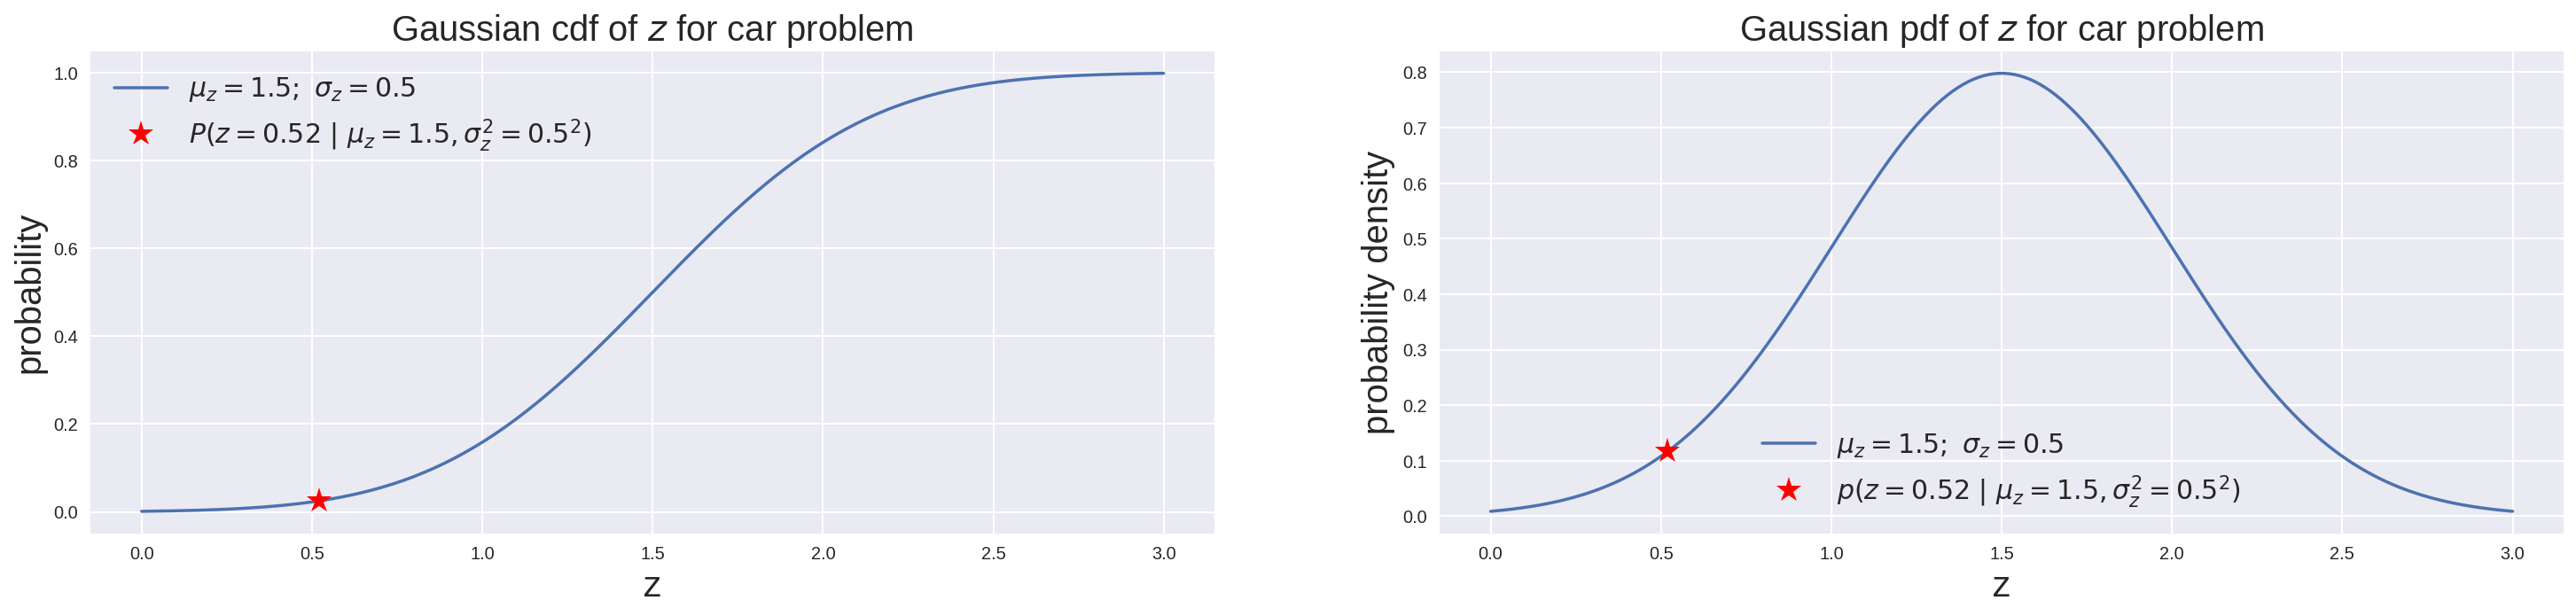

In [6]:
z_value = 0.52 # z = 0.52 seconds
zrange = np.linspace(0, 3, 200) # 200 values for plot
fig_car_norm, (ax1, ax2) = plt.subplots(1, 2) # create subplot (two figures in 1)
ax1.plot(zrange, norm.cdf(zrange, 1.5, 0.5), label=r"$\mu_z=1.5; \ \sigma_z=0.5$") # Figure 1 is cdf
ax1.plot(z_value, norm.cdf(z_value, 1.5, 0.5), 'r*',markersize=15, linewidth=2,
         label=u'$P(z=0.52~|~\mu_z=1.5, \sigma_z^2=0.5^2)$')
ax1.set_xlabel("z", fontsize=20)
ax1.set_ylabel("probability", fontsize=20)
ax1.legend(fontsize=15)
ax1.set_title("Gaussian cdf of $z$ for car problem", fontsize=20)
ax2.plot(zrange, norm.pdf(zrange, 1.5, 0.5), label=r"$\mu_z=1.5; \ \sigma_z=0.5$") # figure 2 is pdf
ax2.plot(z_value, norm.pdf(z_value, 1.5, 0.5), 'r*', markersize=15, linewidth=2,
         label=u'$p(z=0.52~|~\mu_z=1.5, \sigma_z^2=0.5^2)$')
ax2.set_xlabel("z", fontsize=20)
ax2.set_ylabel("probability density", fontsize=20)
ax2.legend(fontsize=15)
ax2.set_title("Gaussian pdf of $z$ for car problem", fontsize=20)
fig_car_norm.set_size_inches(25, 5) # scale figure to be wider (since there are 2 subplots)

### Why is the Gaussian distribution so widely used?

Several reasons:

1. It has two parameters which are easy to interpret, and which capture some of the most basic properties of a distribution, namely its mean and variance.
2. The central limit theorem (Sec. 2.8.6 of the book) tells us that sums of independent random variables have an approximately Gaussian distribution, making it a good choice for modeling residual errors or “noise”.
3. The Gaussian distribution makes the least number of assumptions (has maximum entropy), subject to the constraint of having a specified mean and variance (Sec. 3.4.4 of the book); this makes it a good default choice in many cases.
4. It has a simple mathematical form, which results in easy to implement, but often highly effective, methods.

## Car stopping distance problem

<img src="docs/reaction-braking-stopping.svg" title="Car stopping distance" width="25%" align="right">

$y = {\color{blue}z} x + 0.1 x^2$

where $z$ is a continuous <a title="random variable">rv</a> such that $z \sim \mathcal{N}(\mu_z=1.5,\sigma_z^2=0.5^2)$.

* What is the **expected** value for the reaction time $z$?

This is not a trick question! It's the mean $\mu_z$, of course!

* But how do we compute the expected value for any distribution?

## Moments of a distribution

### First moment: Expected value or mean

The expected value (mean) of a distribution is the **first moment** of the distribution:

$$
\mathbb{E}[z]= \int_{\mathcal{Z}}z p(z) dz
$$

where $\mathcal{Z}$ indicates the support of the distribution (the $z$ domain). 

* Often, $\mathcal{Z}$ is omitted as it is usually between $-\infty$ to $\infty$
* The expected value $\mathbb{E}[z]$ is often denoted by $\mu_z$

As you might expect (pun intended 😆), the expected value is a linear operator:

$$
\mathbb{E}[az+b]= a\mathbb{E}[z] + b
$$

where $a$ and $b$ are fixed variables (NOT rv's).

Additionally, for a set of $n$ rv's, one can show that the expectation of their sum is as follows:

$\mathbb{E}\left[\sum_{i=1}^n z_i\right]= \sum_{i=1}^n \mathbb{E}[z_i]$

If they are **independent**, the expectation of their product is given by

$\mathbb{E}\left[\prod_{i=1}^n z_i\right]= \prod_{i=1}^n \mathbb{E}[z_i]$

## Moments of a distribution

### Second moment (and relation to Variance)

The 2nd moment of a distribution $p(z)$ is:

$$
\mathbb{E}[z^2]= \int_{\mathcal{Z}}z^2 p(z) dz
$$

#### Variance can be obtained from the 1st and 2nd moments

The variance is a measure of the “spread” of the distribution:

$$
\mathbb{V}[z] = \mathbb{E}[(z-\mu_z)^2] = \int (z-\mu_z)^2 p(z) dz = \mathbb{E}[z^2] - \mu_z^2
$$

* It is often denoted by the square of the standard deviation, i.e. $\sigma_z^2 = \mathbb{V}[z] = \mathbb{E}[(z-\mu_z)^2]$

#### Elaboration of the variance as a result of the first two moments of a distribution

$$
\begin{align}
\mathbb{V}[z] & = \mathbb{E}[(z-\mu_z)^2] \\
& = \int (z-\mu_z)^2 p(z) dz \\
& = \int z^2 p(z) dz + \mu_z^2 \int p(z) dz - 2\mu_z \int zp(z) dz \\
& = \mathbb{E}[z^2] - \mu_z^2
\end{align}
$$

where $\mu_z = \mathbb{E}[z]$ is the first moment, and $\mathbb{E}[z^2]$ is the second moment.

Therefore, we can also write the second moment of a distribution as

$$\mathbb{E}[z^2] = \sigma_z^2 + \mu_z^2$$

#### Variance and standard deviation properties

The standard deviation is defined as

$ \sigma_z = \text{std}[z] = \sqrt{\mathbb{V}[z]}$

The variance of a shifted and scaled version of a random variable is given by

$\mathbb{V}[a z + b] = a^2\mathbb{V}[z]$

where $a$ and $b$ are fixed variables (NOT rv's).

If we have a set of $n$ independent rv's, the variance of their sum is given by the sum of their variances

$$
\mathbb{V}\left[\sum_{i=1}^n z_i\right] = \sum_{i=1}^n \mathbb{V}[z_i]
$$

The variance of their product can also be derived, as follows:

$$
\begin{align}
\mathbb{V}\left[\prod_{i=1}^n z_i\right] & = \mathbb{E}\left[ \left(\prod_i z_i\right)^2 \right] - \left( \mathbb{E}\left[\prod_i z_i \right]\right)^2\\
 & = \mathbb{E}\left[ \prod_i z_i^2 \right] - \left( \prod_i\mathbb{E}\left[ z_i \right]\right)^2\\
 & = \prod_i \mathbb{E}\left[  z_i^2 \right] - \prod_i\left( \mathbb{E}\left[ z_i \right]\right)^2\\
 & = \prod_i \left( \mathbb{V}\left[  z_i \right] +\left( \mathbb{E}\left[ z_i \right]\right)^2 \right)- \prod_i\left( \mathbb{E}\left[ z_i \right]\right)^2\\
 & = \prod_i \left( \sigma_{z,\,i}^2 + \mu_{z,\,i}^2 \right)- \prod_i\mu_{z,\,i}^2 \\
\end{align}
$$

## Note about higher-order moments

* The $k$-th moment of a distribution $p(z)$ is defined as the expected value of the $k$-th power of $z$, i.e. $z^k$:

$$
\mathbb{E}[z^k]= \int_{\mathcal{Z}}z^k p(z) dz
$$

## Mode of a distribution

The mode of an <a title="random variable">rv</a> $z$ is the value of $z$ for which $p(z)$ is maximum.

Formally, this is written as,

$$ \mathbf{z}^* = \underset{z}{\mathrm{argmax}}~p(z)$$

If the distribution is multimodal, this may not be unique:
* That's why $\mathbf{z}^*$ is in **bold**, to denote that in general it is a vector that is retrieved!
* However, if the distribution is unimodal (one maximum), like the univariate Gaussian distribution, then it retrieves a scalar $z^*$

Note that even if there is a unique mode, this point may not be a good summary of the distribution.

## Mean vs mode for a non-symmetric distribution

In [7]:
# 1. Create a gamma pdf with parameter a = 2.0

from scipy.stats import gamma # import from scipy.stats the Gamma distribution

a = 2.0 # this is the only input parameter needed for this distribution

# Define the support of the distribution (its domain) by using the
# inverse of the cdf (called ppf) to get the lowest z of the plot that
# corresponds to Pr = 0.01 and the highest z of the plot that corresponds
# to Pr = 0.99:
zrange = np.linspace(gamma.ppf(0.01, a), gamma.ppf(0.99, a), 200) 

mu_z, var_z = gamma.stats(2.0, moments='mv') # This computes the mean and variance of the pdf

fig_gamma_pdf, ax = plt.subplots() # a trick to save the figure for later use
ax.plot(zrange, gamma.pdf(zrange, a), label=r"$\Gamma(z|a=2.0)$")
ax.set_xlabel("z", fontsize=20)
ax.set_ylabel("probability density", fontsize=20)
ax.legend(fontsize=15)
ax.set_title("Gamma pdf for $a=2.0$", fontsize=20)
plt.close(fig_gamma_pdf) # do not plot the figure now. We will show it in a later cell

In [8]:
# 2. Plot the expected value (mean) for this pdf
ax.plot(mu_z, gamma.pdf(mu_z, a), 'r*', markersize=15, linewidth=2, label=u'$\mu_z = \mathbb{E}[z]$')

In [9]:
# 3. Calculate the mode and plot it
from scipy.optimize import minimize # import minimizer

# Finding the maximum of the gamma pdf can be done by minimizing
# the negative gamma pdf. So, we create a function that outputs
# the negative of the gamma pdf given the parameter a=2.0:
def neg_gamma_given_a(z): return -gamma.pdf(z,a)

# Use the default optimizer of scipy (L-BFGS) to find the
# maximum (by minimizing the negative gamma pdf). Note
# that we need to give an initial guess for the value of z,
# so we can use, for example, z=mu_z:
mode_z = minimize(neg_gamma_given_a,mu_z).x

ax.plot(mode_z, np.max(gamma.pdf(mode_z, a)),'g^', markersize=15,
        linewidth=2,label=u'mode $\mathbf{z}^*=\mathrm{argmax}~p(z)$')
ax.legend() # show legend

The mean is  2.0
The mode is approximately  [1.00001618]


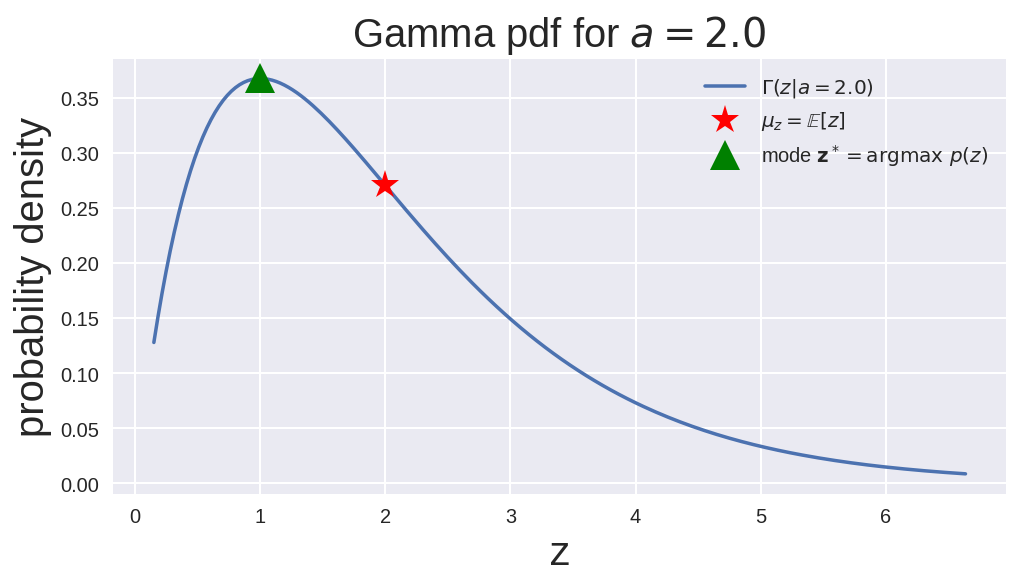

In [10]:
# Code to generate this Gamma distribution hidden during presentation (it's shown as notes)

print('The mean is ',mu_z) # print the mean calculated for this gamma pdf
print('The mode is approximately ',mode_z) # print the mode
fig_gamma_pdf # show figure of this gamma pdf

## The amazing Bayes' rule
<font color='red'>Bayesian</font> <font color='blue'>inference</font> definition:
* <font color='blue'>Inference</font> means “the act of passing from sample data to generalizations, usually with calculated degrees of certainty”.
* <font color='red'>Bayesian</font> is used to refer to inference methods that represent “degrees of certainty” using probability theory, and which leverage Bayes’ rule to update the degree of certainty given data.

**Bayes’ rule** is a formula for computing the probability distribution over possible values of an unknown (or hidden) quantity $z$ given some observed data $y$:

$$
p(z|y) = \frac{p(y|z) p(z)}{p(y)}
$$

Bayes' rule follows automatically from the identity: $p(z|y) p(y) = p(y|z) p(z) = p(y,z) = p(z,y)$

## The amazing Bayes' rule

* I know... You don't find it very amazing (yet!).
* Wait until you realize that almost all ML methods can be derived from this simple formula

$$
p(z|y) = \frac{p(y|z) p(z)}{p(y)}
$$

### See you next class

Have fun!

